### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Loading the dataset

In [3]:
df=pd.read_excel("C:\\Users\\Lenovo\\Downloads\car_price_project\df_car_data_new.xlsx")

### Exploratory Data Analysis

In [4]:
df.head()

,Unnamed: 0,Name,Price(in Rs.),Year,Fuel,KMs Driven,Engine Displacement,No Of Owners,RTO,Transmission,Insurance Type,Mileage,Max Power,Torque
0,0,2019 Maruti Swift Dzire,665000,2019,Petrol,9718,1197 cc,1st Owner,GJ09,Manual,Third Party insurance,21.21 kmpl,81.80bhp,113Nm
1,1,2011 Honda City,399500,2011,Petrol,38647,1497 cc,1st Owner,GJ01,Manual,Third Party insurance,17 kmpl,"118PS at 6,600 rpm",146Nm at 4800 rpm
2,2,2012 Maruti Alto K10,177500,2012,Petrol,89579,998 cc,1st Owner,GJ01,Manual,Third Party insurance,20.92 kmpl,67.1bhp,90Nm
3,3,2016 Maruti Wagon R,360000,2016,Petrol,81674,998 cc,1st Owner,GJ18,Manual,Third Party insurance,21.79 kmpl,67.05bhp,90Nm
4,4,2019 Maruti Eeco,457000,2019,Petrol,14161,1196 cc,1st Owner,GJ38,Manual,Third Party insurance,15.37 kmpl,73bhp,101Nm


In [5]:
df.shape

(7000, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Price(in Rs.)', 'Year', 'Fuel', 'KMs Driven',
       'Engine Displacement', 'No Of Owners', 'RTO', 'Transmission',
       'Insurance Type', 'Mileage', 'Max Power', 'Torque'],
      dtype='object')

**cleaning the dataset and data preprocessing**

In [7]:
# removing 'Unnamed: 0' column
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [8]:
for i in range(0,7000):
    df["Name"][i] =df["Name"][i][4:]

--->KMs Driven

In [9]:
for i in range(2000,4000):
    df["KMs Driven"][i] =df["KMs Driven"][i].replace(",", "").replace(" ", "")

In [10]:
for i in range(0,7000):
    df["KMs Driven"][i] =df["KMs Driven"][i].replace("-", "")

In [11]:
df["KMs Driven"] =  pd.to_numeric(df["KMs Driven"])

--->Price(in Rs.)

In [12]:
for i in range(0,7000):
    df["Price(in Rs.)"][i] =df["Price(in Rs.)"][i].replace(",", "").replace("*", "").replace("-", "").replace(' Cr', '00000')

In [13]:
df["Price(in Rs.)"] =  pd.to_numeric(df["Price(in Rs.)"])

--->Engine Displacement

In [14]:
for i in range(0,7000):
    df["Engine Displacement"][i] =df["Engine Displacement"][i].replace("cc", "").replace("CC", "").replace(" cc", "").replace("17 x 7.5J", '127.5').replace('Grey', "").replace('Black', "").replace("-", "").replace('Blue', "").replace('Silver', '').replace('White', '')

In [15]:
df["Engine Displacement"] =  pd.to_numeric(df["Engine Displacement"]).astype(float)

---> Mileage

In [16]:
for i in range(0,7000):
    df["Mileage"][i] =df["Mileage"][i].replace("kmpl", "").replace("-", "").replace(" km/kg", "").replace('km/hr', "").replace("CC", "")

In [17]:
df["Mileage"] =  pd.to_numeric(df["Mileage"]).astype(float)

---> Max Power

In [18]:
for i in range(0,7000):
    df["Max Power"][i] =df["Max Power"][i].replace("-", "").replace("bhp", "").replace("PS", ".00").replace("nul", "").replace("p", "").replace('Grey', "").replace('Black', "").replace('Blue', "").replace('Silver', '').replace('White', '').replace('l ', "")

In [19]:
for i in range(0,7000):
    df["Max Power"][i] =df["Max Power"][i][:3]

In [20]:
df["Max Power"][884] =df["Max Power"][884].replace('s', "")
df["Max Power"][933] =df["Max Power"][933].replace('s', "")
df["Max Power"][1951] =df["Max Power"][1951].replace('Gre', "")

In [21]:
df["Max Power"] =  pd.to_numeric(df["Max Power"]).astype(float)

--->Torque

In [22]:
for i in range(0,7000):
    df["Torque"][i] = df["Torque"][i].replace("Nm", " ").replace("nm", " ").replace('Grey', "").replace('Black', "").replace('Blue', "").replace('Silver', '').replace('White', '').replace('-', "").replace('@', "").replace('Gold', "").replace('en', "")

In [23]:
for i in range(0,7000):
    df["Torque"][i] =df["Torque"][i][:3]

In [24]:
df["Torque"] =  pd.to_numeric(df["Torque"]).astype(float)

<br><br><br>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 7000 non-null   object 
 1   Price(in Rs.)        6918 non-null   float64
 2   Year                 7000 non-null   object 
 3   Fuel                 7000 non-null   object 
 4   KMs Driven           6918 non-null   float64
 5   Engine Displacement  6910 non-null   float64
 6   No Of Owners         7000 non-null   object 
 7   RTO                  6781 non-null   object 
 8   Transmission         7000 non-null   object 
 9   Insurance Type       6994 non-null   object 
 10  Mileage              6918 non-null   float64
 11  Max Power            6846 non-null   float64
 12  Torque               6903 non-null   float64
dtypes: float64(6), object(7)
memory usage: 711.1+ KB


In [26]:
#checking null values
df.isnull().sum()

Name                     0
Price(in Rs.)           82
Year                     0
Fuel                     0
KMs Driven              82
Engine Displacement     90
No Of Owners             0
RTO                    219
Transmission             0
Insurance Type           6
Mileage                 82
Max Power              154
Torque                  97
dtype: int64

In [27]:
#dropping null values in Insurance Type since there are only 6 null values
df = df[df['Insurance Type'].notna()]

In [28]:
df['Price(in Rs.)'].fillna(df['Price(in Rs.)'].mean(), inplace=True)
df['KMs Driven'].fillna(df['KMs Driven'].mean(), inplace=True)
df['Engine Displacement'].fillna(df['Engine Displacement'].mean(), inplace=True)
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Max Power'].fillna(df['Max Power'].mean(), inplace=True)
df['Torque'].fillna(df['Torque'].mean(), inplace=True)

In [29]:
df['RTO'].fillna(' NA', inplace=True)

In [30]:
#checking null values after replacing null values
df.isnull().sum()

Name                   0
Price(in Rs.)          0
Year                   0
Fuel                   0
KMs Driven             0
Engine Displacement    0
No Of Owners           0
RTO                    0
Transmission           0
Insurance Type         0
Mileage                0
Max Power              0
Torque                 0
dtype: int64

We can see that all the null values are removed now

In [31]:
# shape of the data after removing null values
df.shape

(6994, 13)

### Univariate Analysis

In [32]:
df= df.rename(columns={"Price(in Rs.)":"Price"})

In [33]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
# Analysing target variable
df.Price.describe()

count       6994.00000
mean     3152068.49552
std      5272558.90385
min        10000.00000
25%       430000.00000
50%       884000.00000
75%      4250000.00000
max     88150000.00000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

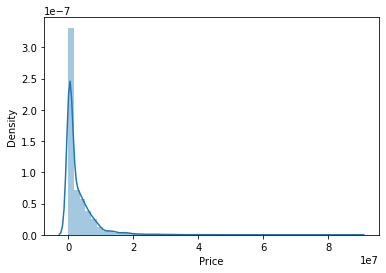

In [35]:
sns.distplot(df['Price'])

<AxesSubplot:>

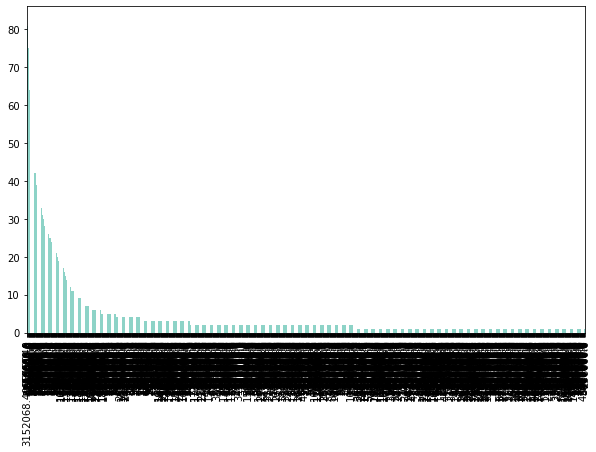

In [36]:
plt.subplots(figsize=(10, 6))
df['Price'].value_counts().plot.bar(cmap='Set3')

In [37]:
df['Price_bin'] = 0
df.loc[df['Price']<1000000,'Price_bin'] = 0
df.loc[(df['Price']>1000000) & (df['Price']<=2000000),'Price_bin'] =1
df.loc[(df['Price']>2000000) & (df['Price']<=3000000),'Price_bin'] =2
df.loc[(df['Price']>3000000) & (df['Price']<=4000000),'Price_bin'] =3
df.loc[(df['Price']>4000000) & (df['Price']<=5000000),'Price_bin'] =4
df.loc[(df['Price']>5000000) & (df['Price']<=6000000),'Price_bin'] =5
df.loc[(df['Price']>6000000) & (df['Price']<=7000000),'Price_bin'] =6
df.loc[(df['Price']>7000000) & (df['Price']<=8000000),'Price_bin'] =7
df.loc[(df['Price']>8000000) & (df['Price']<=9000000),'Price_bin'] =8
df.loc[(df['Price']>9000000) & (df['Price']<=10000000),'Price_bin'] =9
df.loc[df['Price']>10000000,'Price_bin'] =10

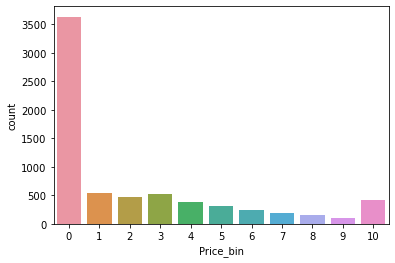

In [38]:
sns.countplot(x ='Price_bin', data = df)
plt.show()

In [39]:
df.Name.values[0:10]

array([' Maruti Swift Dzire', ' Honda City', ' Maruti Alto K10',
       ' Maruti Wagon R', ' Maruti Eeco', ' Maruti Eeco', ' Maruti Eeco',
       ' Maruti Eeco', ' Maruti Swift Dzire', ' Maruti Swift Dzire'],
      dtype=object)

In [40]:
# It is observed that Car Name consists of two parts 'Car company' + ' ' + 'Car Model'
# Let's split out car model to a new column.

In [41]:
df['Brand_name'] = df.Name.str.split(' ').str.get(1).str.upper()

In [42]:
len(set(df.Brand_name.values))

242

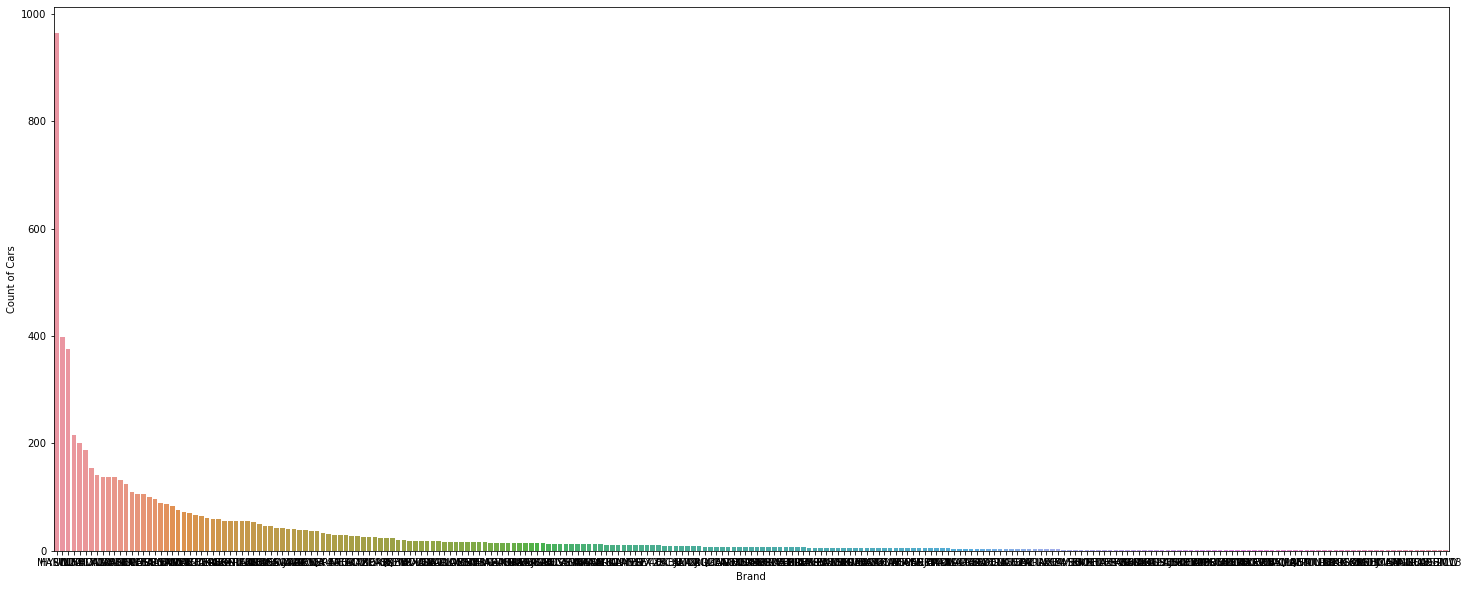

<Figure size 432x288 with 0 Axes>

In [43]:
# Let's see companies and their no of models.
fig, ax = plt.subplots(figsize = (25,10))
plt1 = sns.countplot(df['Brand_name'], order=pd.value_counts(df['Brand_name']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

In [44]:
## encoding data

In [45]:
df.replace({"1st Owner": 1, "1st ": 1, 'First ':1, 'First Owner': 1, 
            "Second Owner": 2, "2nd ": 2, 'Second ':2, '2nd Owner':2,
            "Third Owner": 3, '3rd Owner':3, '3rd ':3, 'Third ':3,
           'Fourth & Above Owner':4, 'Fourth & Above ': 4, '4th ': 4, 'Test Drive Car':0, '-':0}, inplace = True)

In [46]:
df.replace({"Petrol": 1, "Diesel": 2, 'CNG':3, 'LPG': 4, 
            "Electric": 5}, inplace = True)

In [47]:
df.replace({"Available": 1, 'Insurance': 1, "Manual": 2, 'Comprehensive':4, 'Corporate': 5, 
            "Third Party insurance": 3, 'Third Party':3, 'Automatic':6, 'Individual': 7,
            'No Insurance':0, 'Not Available':0,'No insurance' : 0}, inplace = True)

In [48]:
# As RTO is Nominal Categorical data we will perform OneHotEncoding

rto = df[["RTO"]]

rto = pd.get_dummies(rto, drop_first= True)

In [49]:
# As Transmission is Nominal Categorical data we will perform OneHotEncoding

transmission = df[["Transmission"]]

transmission = pd.get_dummies(transmission, drop_first= True)

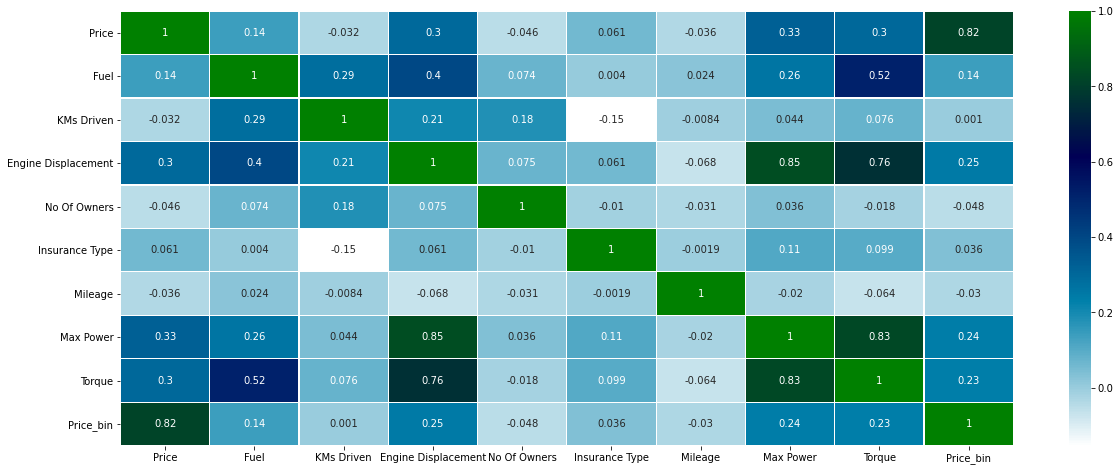

In [50]:
# heat map
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),linewidths=.1,cmap="ocean_r", annot=True)
plt.yticks(rotation=0);

In [51]:
df.describe()

,Price,Fuel,KMs Driven,Engine Displacement,No Of Owners,Insurance Type,Mileage,Max Power,Torque,Price_bin
count,6994.00000,6994.00000,6994.00000,6994.00000,6994.00000,6994.00000,6994.00000,6994.00000,6994.00000,6994.00000
mean,3152068.49552,1.47212,58970.45356,1480.27817,1.22848,2.31327,19.63011,102.38699,183.90980,2.19831
std,5272558.90385,0.55281,38990.16423,534.03390,0.51280,1.78409,28.71714,46.30202,116.03524,3.06747
min,10000.00000,0.00000,472.00000,5.00000,0.00000,0.00000,0.00000,5.00000,4.80000,0.00000
25%,430000.00000,1.00000,34000.00000,1197.00000,1.00000,0.00000,16.90000,74.00000,110.00000,0.00000
50%,884000.00000,1.00000,56072.00000,1248.00000,1.00000,3.00000,19.60000,88.00000,154.00000,0.00000
75%,4250000.00000,2.00000,76988.50000,1591.00000,1.00000,4.00000,22.00000,117.00000,219.00000,4.00000
max,88150000.00000,5.00000,750000.00000,5935.00000,4.00000,7.00000,2393.00000,552.00000,850.00000,10.00000


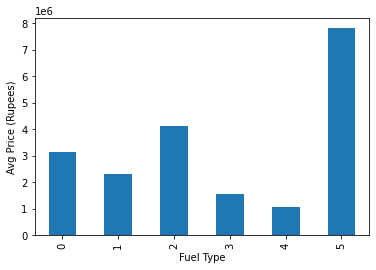

In [52]:
# Let's see how price varies with  Fuel Type
df_fuel_avg_price = df[['Fuel','Price']].groupby("Fuel", as_index = False).mean()
plt1 = df_fuel_avg_price.plot(x = 'Fuel', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Rupees)")
plt.show()

Encoding Name column

In [56]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df['Name'] = labelencoder.fit_transform(df["Name"])

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
        if df[column_name].dtype == object:
            df[column_name] = le.fit_transform(df[column_name])
        else:
            pass

### Model creation

In [59]:
X=df.drop(['Price'], axis=1)
y=df['Price']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))

The accuracy of the Logistic Regression is 0.07505360972122944


In [63]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

Coefficients:  [-5.99508940e-02  3.73937687e+01  1.66385435e+01 -7.78074940e-03
 -2.41726879e-01 -1.78161572e+01 -3.40111631e-02  1.66233813e+00
 -1.45055438e+00  5.11687400e-01  1.41961122e-01 -1.93488510e+00
  4.51138407e+01  3.41157224e-01]
Variance score: 0.2751881843667713


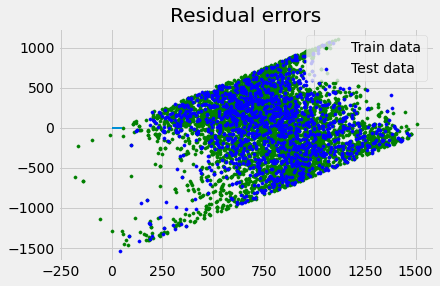

In [64]:
# regression coefficients
print('Coefficients: ', lm.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lm.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [65]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

160.20766244703452
[-5.99508940e-02  3.73937687e+01  1.66385435e+01 -7.78074940e-03
 -2.41726879e-01 -1.78161572e+01 -3.40111631e-02  1.66233813e+00
 -1.45055438e+00  5.11687400e-01  1.41961122e-01 -1.93488510e+00
  4.51138407e+01  3.41157224e-01]


In [67]:
y_pred = regressor.predict(X_test)

### Random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [71]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 7.9 s


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [72]:
# checking the oob score
classifier_rf.oob_score_

0.08954423592493298

### Hyper Parameter Tuning

In [73]:
# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [74]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [77]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 25.7min finished


Wall time: 25min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [78]:
grid_search.best_score_

0.2865039508089265

In [79]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [80]:
prediction = classifier_rf.predict(X_test)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 204.64403145103645
MSE: 110955.76626161544
RMSE: 333.1002345565302


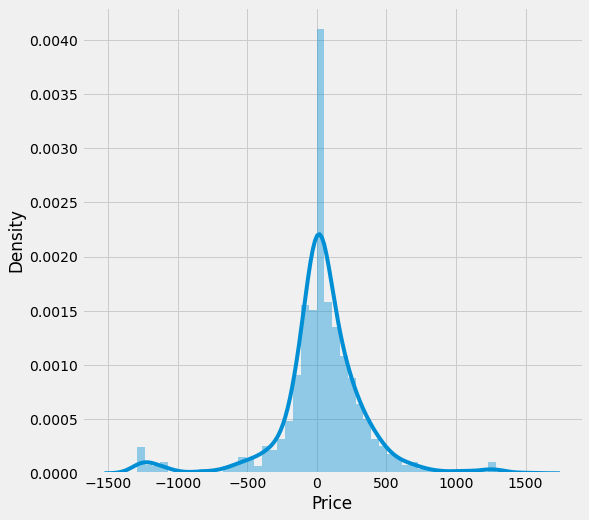

In [82]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

### Predictions

In [68]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5121,654,988.87834
4105,1589,708.91983
4352,1438,839.93956
263,1069,968.50888
5408,1493,939.48378
...,...,...
1733,1349,1207.41112
5828,1018,1156.09500
1860,1560,923.62448
3897,1376,924.82010


### Saving the model

In [83]:
import joblib

In [84]:
joblib.dump(classifier_rf, 'car_price_prediction_project.pkl')

['car_price_prediction_project.pkl']

In [85]:
# Load the model from the file
classifier_rf_from_joblib = joblib.load('car_price_prediction_project.pkl') 

In [86]:
# Use the loaded model to make predictions
classifier_rf_from_joblib.predict(X_test)

array([ 514, 1300,  830, ..., 1300, 1084,  374])